## Fashion MNIST CNN


In [46]:
# Load mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [47]:

def load_dataset():
    # load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


In [48]:
def prep_pixels(train, test):
    # convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [49]:

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
#evaluate model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
    	# select rows for train and test
    	trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    	# fit model
    	history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=True)
    	# evaluate model
    	_, acc = model.evaluate(testX, testY, verbose=True)
    	print('> %.3f' % (acc * 100.0))
    	# stores scores
    	scores.append(acc)
    	histories.append(history)
    return scores, histories

In [51]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['acc'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
	pyplot.show()
    
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()


In [52]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# evaluate model
	scores, histories = evaluate_model(model, trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 23s 470us/step - loss: 0.4412 - acc: 0.8436 - val_loss: 0.3578 - val_acc: 0.8675
Epoch 2/10
48000/48000 [==============================] - 23s 477us/step - loss: 0.2982 - acc: 0.8920 - val_loss: 0.2811 - val_acc: 0.8981
Epoch 3/10
48000/48000 [==============================] - 22s 464us/step - loss: 0.2522 - acc: 0.9077 - val_loss: 0.2925 - val_acc: 0.8894
Epoch 4/10
48000/48000 [==============================] - 22s 457us/step - loss: 0.2209 - acc: 0.9196 - val_loss: 0.2602 - val_acc: 0.9050
Epoch 5/10
48000/48000 [==============================] - 22s 457us/step - loss: 0.1975 - acc: 0.9267 - val_loss: 0.2525 - val_acc: 0.9068
Epoch 6/10
48000/48000 [==============================] - 22s 464us/step - loss: 0.1802 - acc: 0.9330 - val_loss: 0.2587 - val_acc: 0.9077
Epoch 7/10
48000/48000 [==============================] - 23s 473us/step - loss: 0.1600 - acc: 0.9414 - val_loss: 0.

C:\Users\eslem\Anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


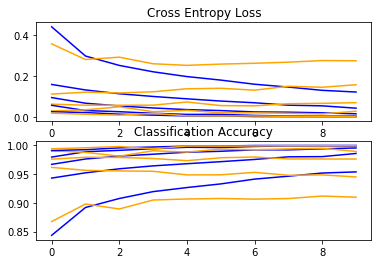

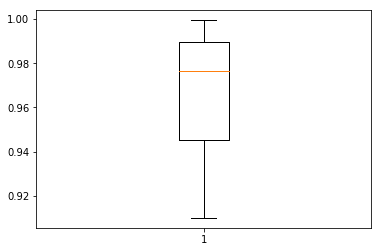

In [55]:
run_test_harness()
